In [6]:
!pip install imblearn
import pandas as pd
import imblearn

from src.preprocessing import Preprocessing
from src.visualization import Visualization

ModuleNotFoundError: No module named 'imblearn'

In [2]:
# Read Data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
Preprocessing.data_info(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 128 entries, Unnamed: 0 to Q050
dtypes: float64(3), int64(79), object(46)
memory usage: 13.4+ MB


{'shape': (13730, 128),
 'describe':          Unnamed: 0   NU_ANO  CO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  \
 count  13730.000000  13730.0             1.373000e+04      13730.000000   
 mean    2288.173926   2016.0             3.088548e+06         30.736708   
 std     1321.230607      0.0             9.890495e+05          9.862405   
 min        0.000000   2016.0             1.100023e+06         11.000000   
 25%     1144.000000   2016.0             2.307650e+06         23.000000   
 50%     2288.000000   2016.0             3.118601e+06         31.000000   
 75%     3432.000000   2016.0             3.550308e+06         35.000000   
 max     4586.000000   2016.0             5.300108e+06         53.000000   
 
            NU_IDADE  TP_ESTADO_CIVIL   TP_COR_RACA  TP_NACIONALIDADE  \
 count  13730.000000     13730.000000  13730.000000      13730.000000   
 mean      21.593809         0.111580      2.185652          1.048871   
 std        7.043654         0.359573      1.007285        

In [4]:
train.drop(['Unnamed: 0', 'NU_INSCRICAO'], axis=1, inplace = True)

In [5]:
df_train = Preprocessing.select_features(train, 'IN_TREINEIRO')

df_train

,NU_IDADE,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_CERTIFICADO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,IN_TREINEIRO
0,24,0.0,1,4,1,0,1,1,1,1,0
1,17,0.0,2,0,2,0,1,1,1,1,0
2,21,0.0,3,0,1,0,0,0,0,0,0
3,25,0.0,1,9,1,0,0,0,0,0,0
4,28,0.0,1,4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13725,20,0.0,1,3,1,0,1,1,1,1,0
13726,33,0.0,1,10,1,0,1,1,1,1,0
13727,15,0.0,3,0,1,0,1,1,1,1,1
13728,36,1.0,4,0,1,1,1,1,1,1,0


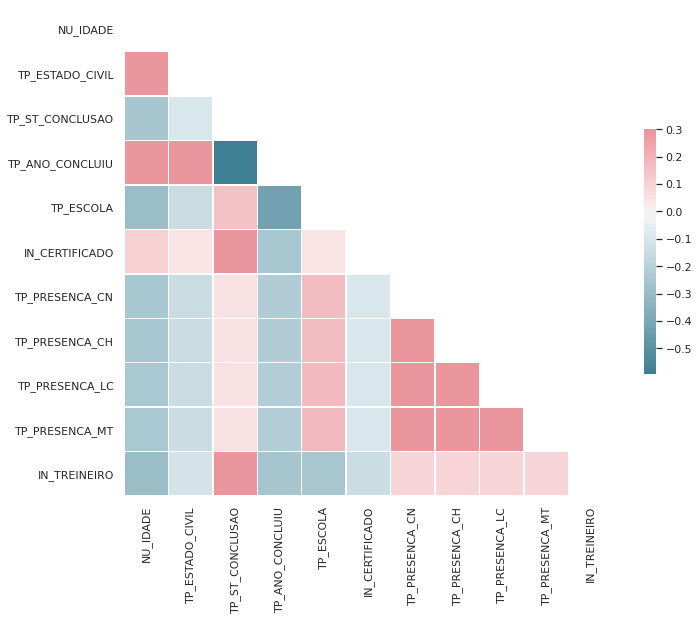

In [6]:
Visualization.correlation_features(df_train)

In [7]:
df_train.shape

(13730, 11)

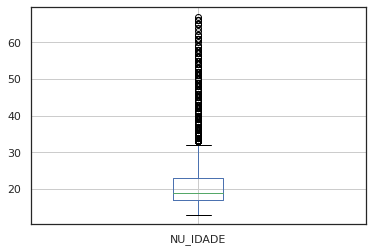

In [8]:
columns = ['NU_IDADE']
df_train = Visualization.verify_outliers(df_train, 9, 120, columns)

In [9]:
df_train.shape

(13730, 11)

In [10]:
df_train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

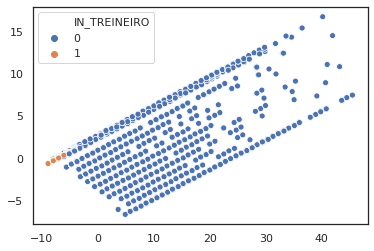

In [11]:
x = df_train.drop('IN_TREINEIRO', axis=1)
target = df_train['IN_TREINEIRO']

Visualization.balancing_analysis(x, target)